In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import io
import seaborn as sns

In [8]:
#import the automatic search results and the two manual searches
auto = pd.read_csv("https://raw.githubusercontent.com/nachkontrolle/EyePOCUS/master/auto.csv")
man1 = pd.read_csv("https://raw.githubusercontent.com/nachkontrolle/EyePOCUS/master/manual1.csv")
man2 = pd.read_csv("https://raw.githubusercontent.com/nachkontrolle/EyePOCUS/master/manual2.csv")

# combine the three searches
alltwt= pd.concat([auto, man1, man2], ignore_index=True)

# filter the combined list of tweets twtimg to only include tweets with images
twtimg = alltwt[alltwt.imagepresent == 1]
twtimg.drop('imagepresent', axis=1, inplace=True)


print("An initial manual collection yielded " + str(len(man1.index)) + " images")
print("Automated collection yielded " + str(len(auto.index)) + " nonduplicate images, with only 17 Optical Ultrasodun images")
print("A further supplementary search with the same string prior to data analysis showed " + str(len(man2.index)) + " new images which were also included for analysis")
print("Total number of available images collected was " + str(len(twtimg.index)))

print(twtimg.columns)

An initial manual collection yielded 14 images
Automated collection yielded 59 tweets, with only 17 images
A further supplementary search with the same string prior to data analysis showed 28 new images which were also included for analysis
Total number of available images collected was 47
Index(['status_url', 'from_user', 'user_lang', 'user_followers_count',
       'user_friends_count', 'grade', 'institution', 'indication', 'findings',
       'mi', 'ti'],
      dtype='object')


In [13]:
#set data types for numeric values and add NaNs where no appropriate data exists
numcols = ['user_followers_count','user_friends_count','grade', 'institution', 'mi', 'ti']
twtimg[numcols]=twtimg[numcols].apply(pd.to_numeric, errors='coerce')

NaN      29
 0.20     3
 0.13     3
 0.80     2
 0.90     2
 1.00     2
 1.30     1
 0.60     1
 1.20     1
 0.15     1
 0.70     1
 1.10     1
Name: mi, dtype: int64


/Users/nealbreakey/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [14]:
#tidy up the value names to remove duplicate names and tidy up categories
cleanup_values = {"findings":     {"papil": "opticnervechange", "pap": "opticnervechange", "wideonsd": "opticnervechange", "lensdis": "lens_dislocation"}}
twtimg.replace(cleanup_values, inplace=True)



In [49]:
#show value counts for indications
print(twtimg["indication"].value_counts(dropna=False))
print(twtimg["findings"].value_counts(dropna=False))

NaN           21
visualloss    12
pain           5
trauma         5
onsd           2
proptosis      1
normal         1
Name: indication, dtype: int64
postdetach          15
opticnervechange     9
NaN                  7
normal               5
lens_dislocation     4
abscess              1
foreign              1
glaucoma             1
vithaem              1
Nan                  1
rupture              1
drusen               1
Name: findings, dtype: int64


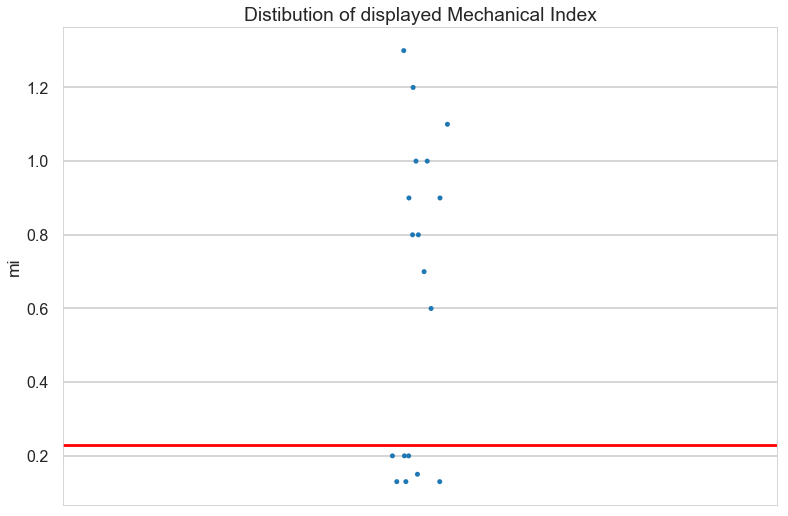

In [46]:
sns.set_style('whitegrid')
plt.title("Distibution of displayed Mechanical Index")
thresholdmi = 0.23
plt.axhline(thresholdmi, color='red', linestyle='solid', label="MI Threshold")
sns.stripplot(y="mi", hue="findings", data=twtimg, jitter=0.04, marker="o")

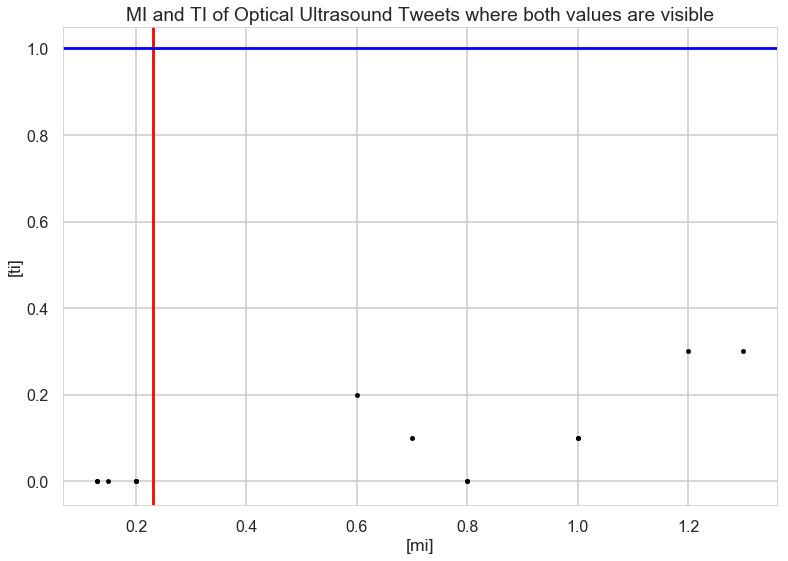

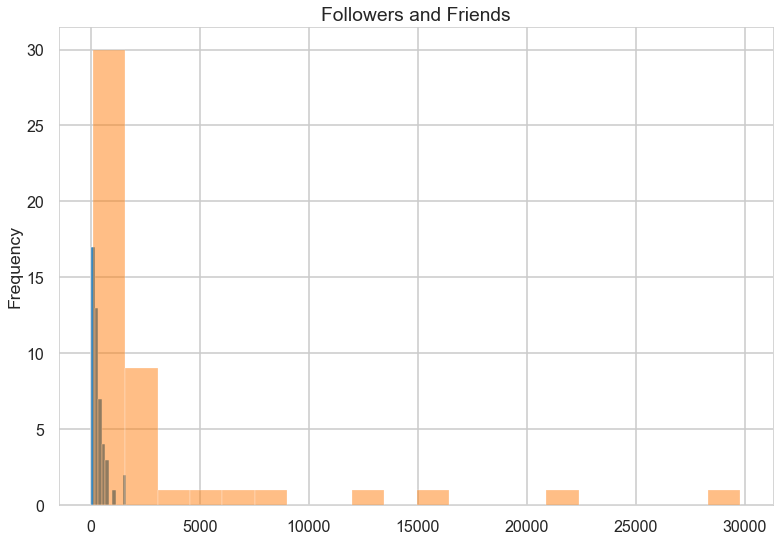

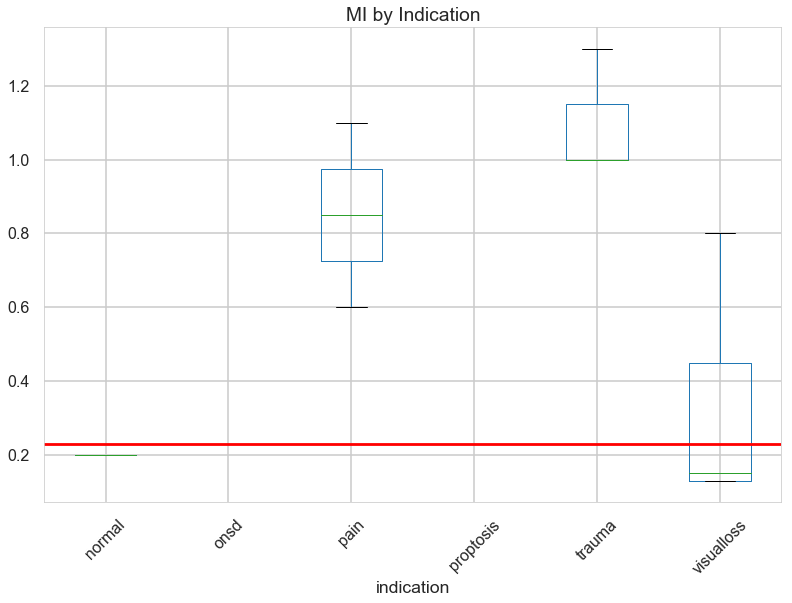

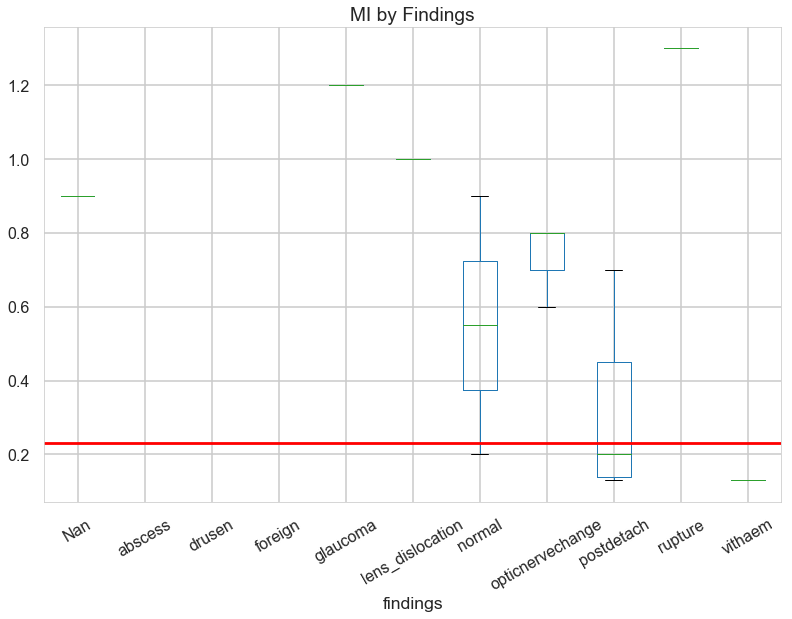

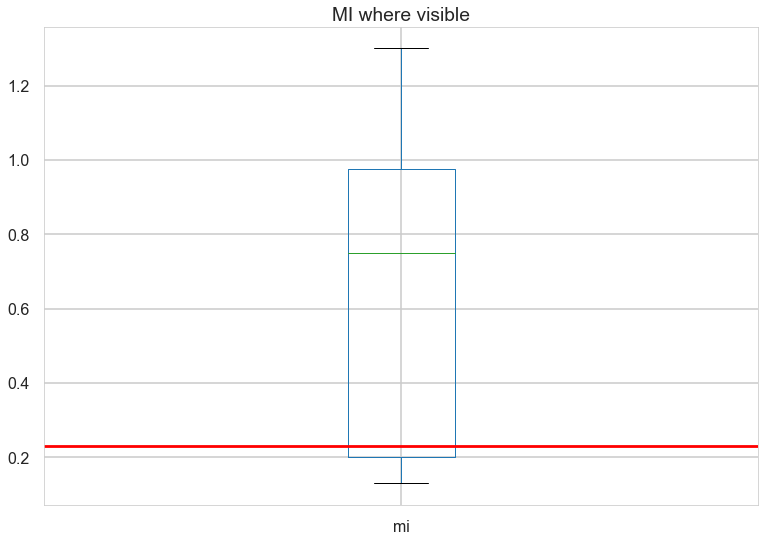

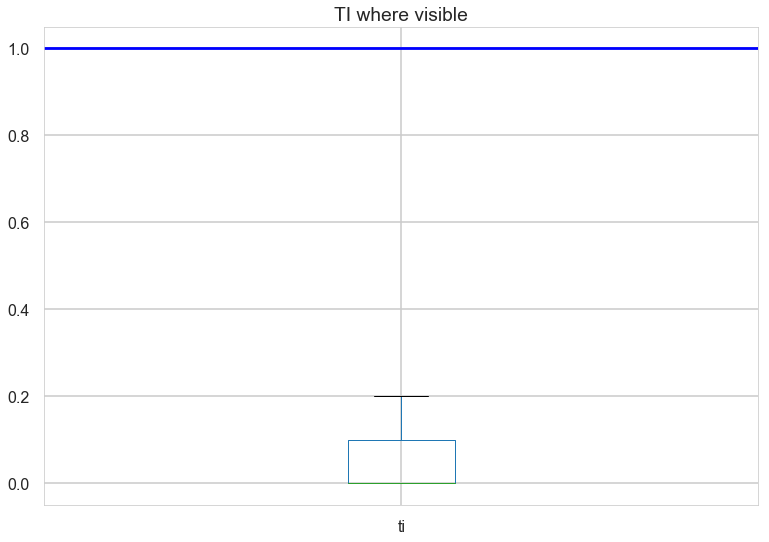

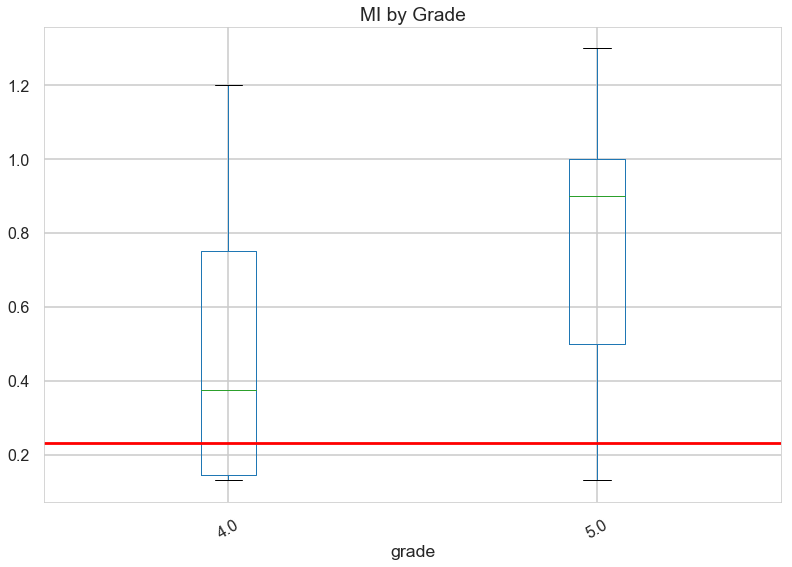

In [47]:
# plots for MI and TI in a scatter with thresholds
twtimg.plot(x=["mi"], y=["ti"], kind='scatter', use_index=False, title="MI and TI of Optical Ultrasound Tweets where both values are visible", c="black")

thresholdmi = 0.23
thresholdti = 1

plt.axvline(thresholdmi, color='red', linestyle='solid', label="MI Threshold")
plt.axhline(thresholdti, color='blue', linestyle='solid', label="TI Threshold")
plt.show()

twtimg["user_friends_count"].plot.hist(alpha=1, bins=10)
twtimg["user_followers_count"].plot.hist(alpha=0.5, bins=20)
plt.title("Followers and Friends")
plt.show()

twtimg.boxplot(column="mi", by="indication", grid=True, rot=45)
plt.title("MI by Indication")
plt.suptitle("")
plt.axhline(thresholdmi, color='red', linestyle='solid', label="MI Threshold")
plt.show()

twtimg.boxplot(column="mi", by="findings", grid=True, rot=30)
plt.title("MI by Findings")
plt.suptitle("")
plt.axhline(thresholdmi, color='red', linestyle='solid', label="MI Threshold")
plt.show()

twtimg.boxplot(column="mi", grid=True, rot=0)
plt.title("MI where visible")
plt.suptitle("")
plt.axhline(thresholdmi, color='red', linestyle='solid', label="MI Threshold")
plt.show()

twtimg.boxplot(column="ti", grid=True, rot=0)
plt.title("TI where visible")
plt.suptitle("")
plt.axhline(thresholdti, color='blue', linestyle='solid', label="TI Threshold")
plt.show()

twtimg.boxplot(column="mi", by="grade", grid=True, rot=30)
plt.title("MI by Grade")
plt.suptitle("")
plt.axhline(thresholdmi, color='red', linestyle='solid', label="MI Threshold")
plt.show()